In [3]:
# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [6]:
# Importing the training set
dataset_train = pd.read_csv('gdrive/MyDrive/Machine Learning Course/NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values

In [7]:
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


**Analyze the closing prices from dataframe**

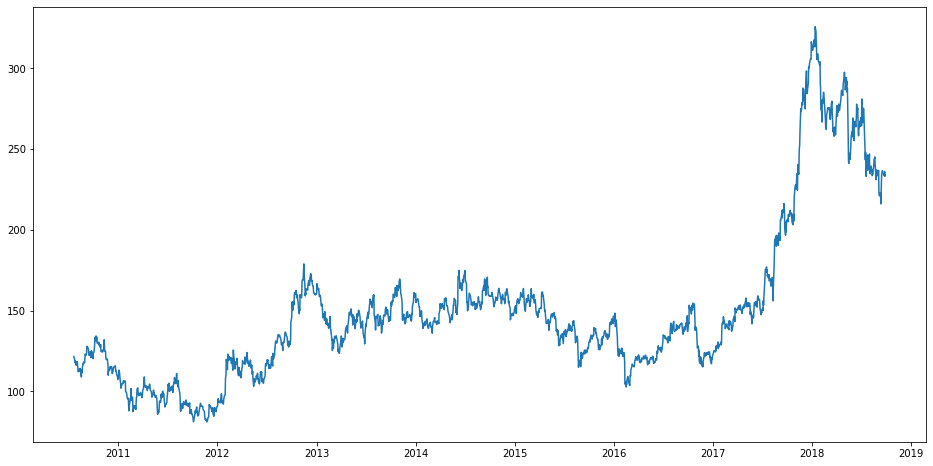

In [8]:
dataset_train["Date"]=pd.to_datetime(dataset_train.Date,format="%Y-%m-%d")
dataset_train.index=dataset_train['Date']

plt.figure(figsize=(16,8))
plt.plot(dataset_train["Close"],label='Close Price history')

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [10]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [11]:
X_train.shape, y_train.shape

((1975, 60), (1975,))

In [12]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [13]:
X_train.shape, y_train.shape

((1975, 60, 1), (1975,))

**Use LSTM Model**

In [14]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

'''lstm_model=Sequential()
lstm_model.add(LSTM(units=50,return_sequences=True,input_shape=(X_train.shape[1],1)))
lstm_model.add(Dropout(0.2))

lstm_model.add(LSTM(50, return_sequences=True))
lstm_model.add(Dropout(0.2))


lstm_model.add(Dense(units = 1))



lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
lstm_model.fit(X_train,y_train,epochs=100,batch_size=32, verbose=1)'''

regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [15]:
regressor.fit(X_train, y_train, epochs = 25, batch_size = 32, verbose=1)

Epoch 1/25
62/62 [==============================] - 31s 61ms/step - loss: 0.0261
Epoch 2/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0029
Epoch 3/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0026
Epoch 4/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0029
Epoch 5/25
62/62 [==============================] - 4s 62ms/step - loss: 0.0029
Epoch 6/25
62/62 [==============================] - 4s 62ms/step - loss: 0.0024
Epoch 7/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0022
Epoch 8/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0025
Epoch 9/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0023
Epoch 10/25
62/62 [==============================] - 4s 60ms/step - loss: 0.0019
Epoch 11/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0018
Epoch 12/25
62/62 [==============================] - 4s 61ms/step - loss: 0.0016
Epoch 13/25
62/62 [=================

**Making Predictions**

In [16]:
dataset_test = pd.read_csv('gdrive/MyDrive/Machine Learning Course/tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [17]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

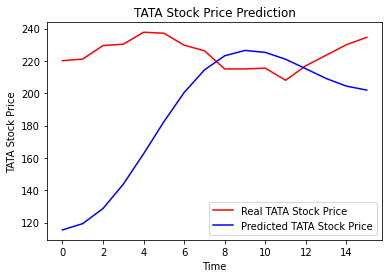

In [19]:


# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()


